# Figure C2: Collocation errors Landsat

The collocations errors for the Landsat are based on collocations run on spire ADS-B data, the results of which were saved to [landsat-figure2.csv](../../data/figure_2_adsb/landsat-figure2.csv). Here, we plot the results similar to [figure_2.ipynb](notebooks/paper_reproduction/figure_2.ipynb), but without the example image. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
df = pd.read_csv("../../data/figure_2_adsb/landsat-figure2.csv")
df

,Unnamed: 0,error_naive,error_pred,ontrack_error_naive,offtrack_error_naive,ontrack_error,offtrack_error
0,0,958.107485,114.247442,899.402717,-330.219178,99.519594,-56.109967
1,1,1350.801033,450.449361,892.745218,1013.740305,450.026482,-19.513894
2,2,139.374380,488.043000,89.947036,106.464776,482.078671,76.066585
3,3,694.133597,22.556709,-694.047308,-10.944612,-20.866315,-8.567497
4,4,1517.288297,1154.693414,1425.458658,-519.837850,1153.313573,-56.432978
...,...,...,...,...,...,...,...
1463,1463,3086.667904,370.913996,3062.468607,385.752224,370.912017,1.211545
1464,1464,1293.477505,313.737689,-1150.169625,591.771822,309.866869,-49.131057
1465,1465,1030.899213,614.654547,1021.243573,140.764882,594.549192,155.921358
1466,1466,1055.994676,454.996538,-733.312737,-759.853397,-453.506036,36.798447


In [3]:
# 95th percentiles
p95_naive = df["error_naive"].quantile(0.95)
p95_pred = df["error_pred"].quantile(0.95)
print("Naive error 95th percentile:", p95_naive)
print("Predicted error 95th percentile:", p95_pred)

Naive error 95th percentile: 3526.167885704458
Predicted error 95th percentile: 621.4669248879821


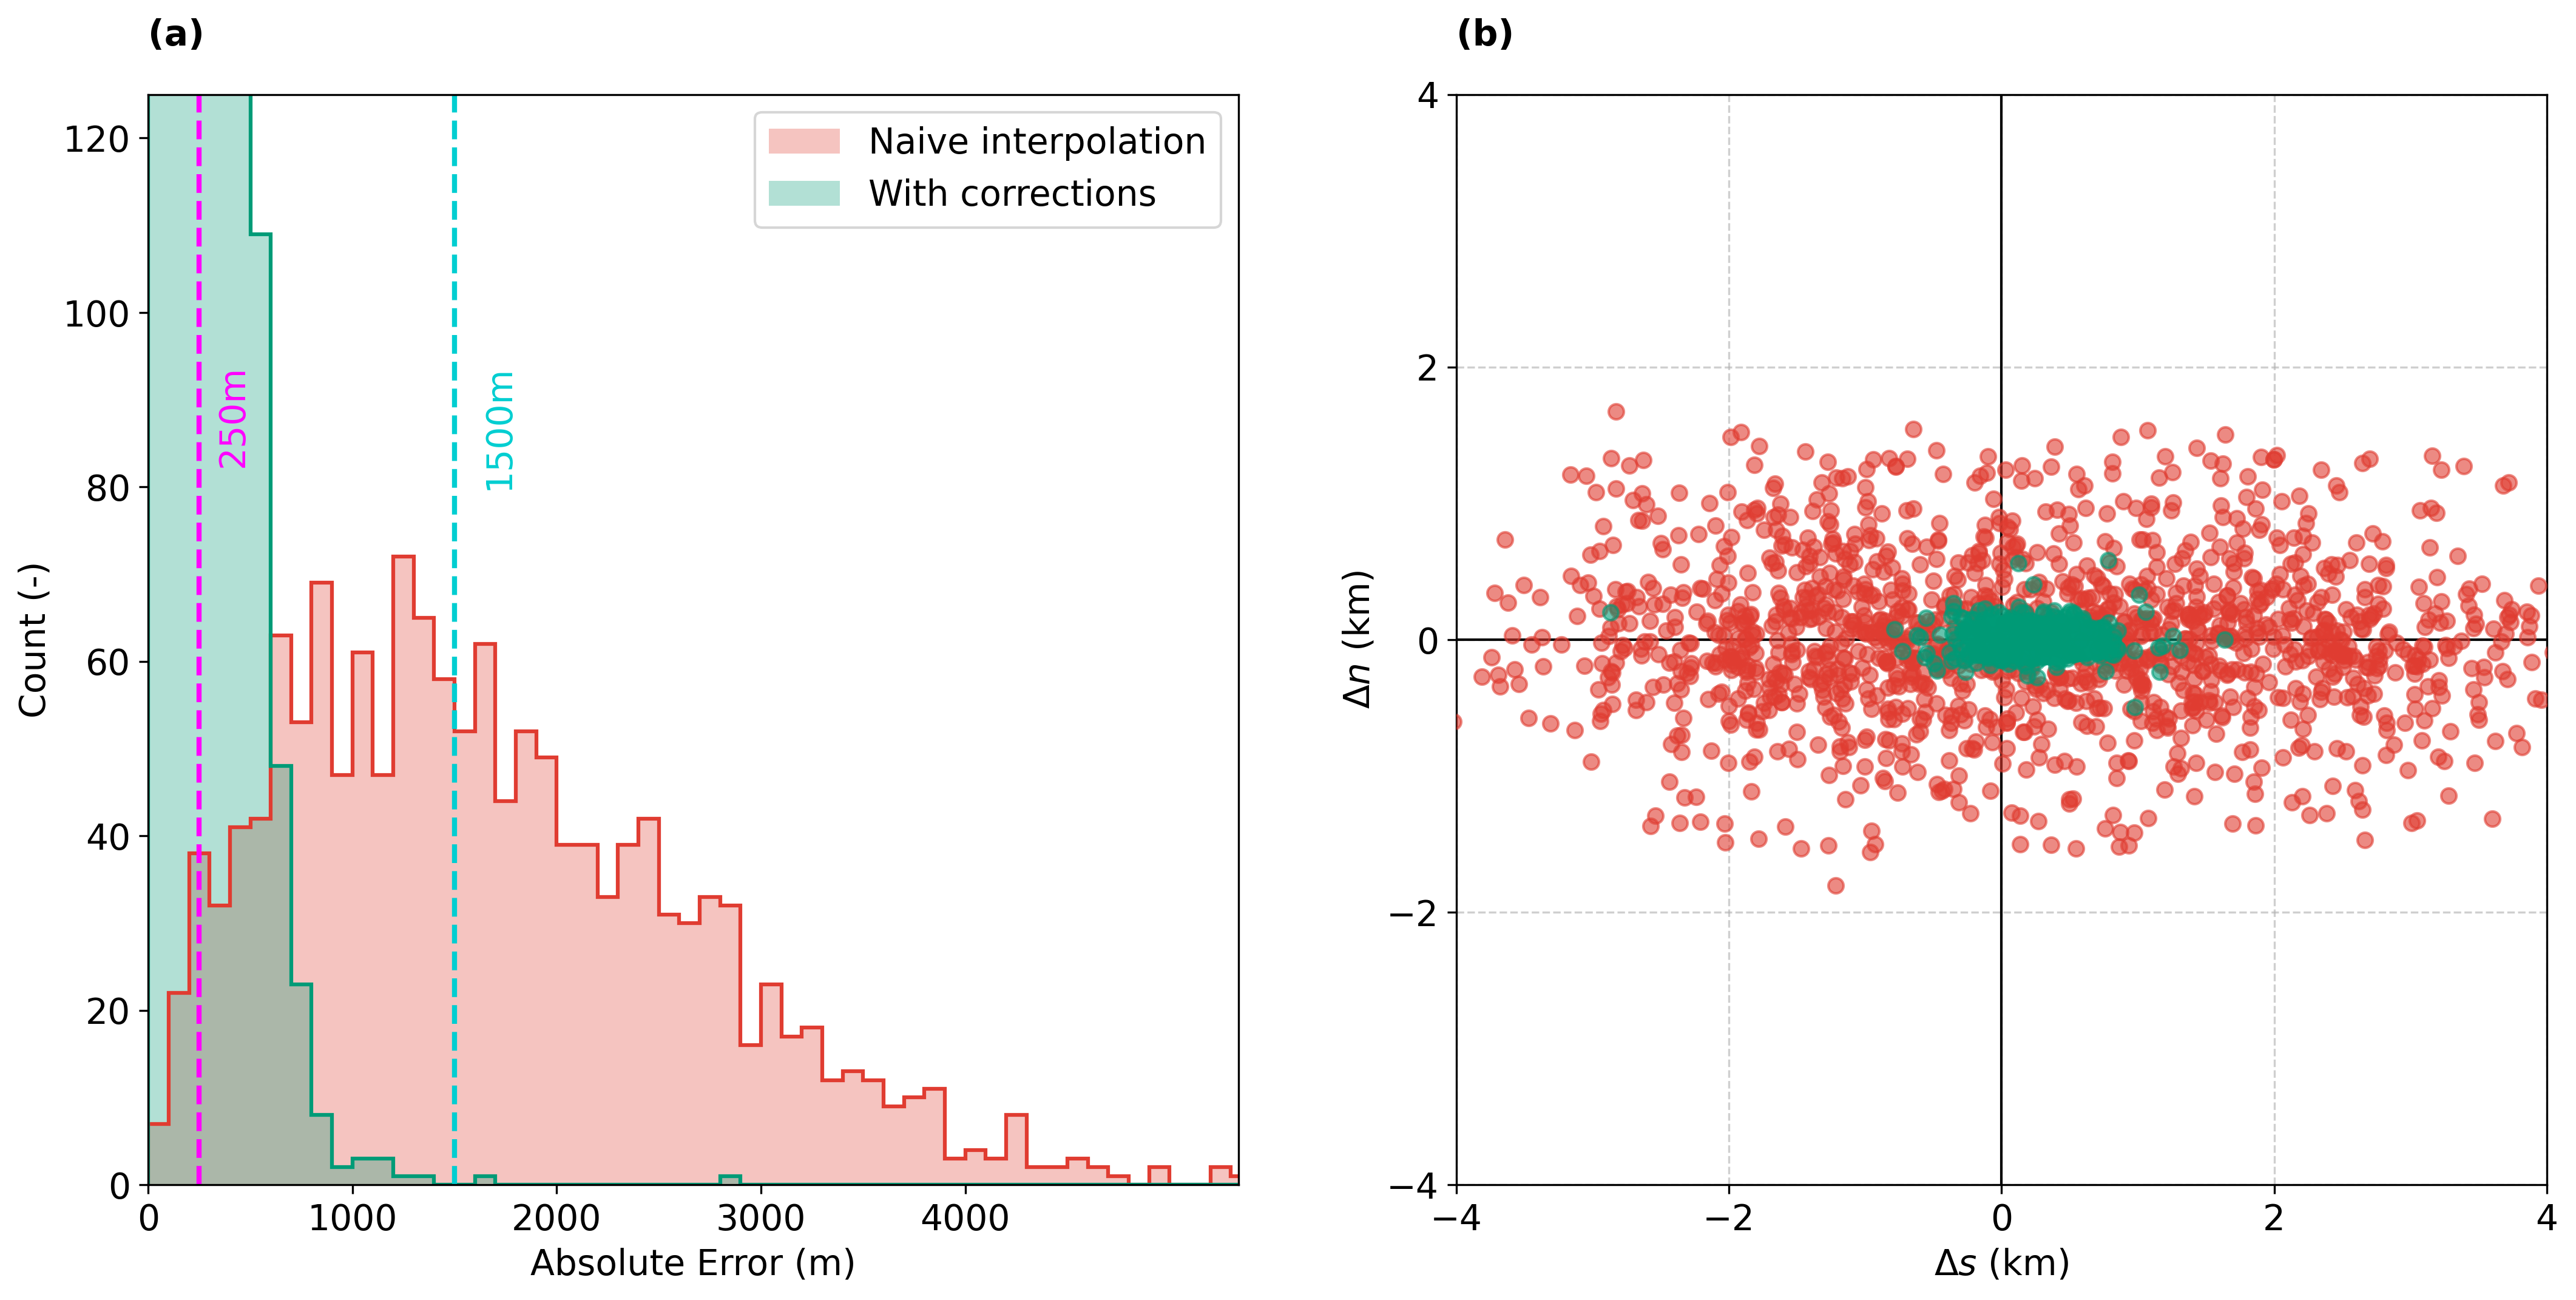

In [4]:
colors = {
    "naive": "#E03C31",
    "pred": "#009B77",
    "circle_250": "magenta",
    "circle_1500": "darkturquoise",
    "arrow": "yellow",
    "flight_path": "white"
}

plt.rcParams.update({
    "axes.titlesize": 14,
    "axes.labelsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14
})

fig = plt.figure(figsize=(17, 10), dpi=300)

gs = gridspec.GridSpec(
    1, 2,              # 1 row, 2 columns (side by side)
    width_ratios=[1, 1],
    wspace=0.2,
    hspace=0.0
)

ax1 = fig.add_subplot(gs[0, 0])  # Left plot (e.g., histogram)
ax2 = fig.add_subplot(gs[0, 1])  # Right plot (e.g., scatter)
# --------------------------
# (a) Histogram
bin_size = 100
max_error = max(df["error_naive"].max(), df["error_pred"].max())
bins = np.arange(0, max_error + bin_size, bin_size)

ax1.hist(df["error_naive"], bins=bins, histtype="stepfilled", facecolor=colors["naive"], alpha=0.3,
         edgecolor="none", label="Naive interpolation")
ax1.hist(df["error_naive"], bins=bins, histtype="step", linewidth=1.5, color=colors["naive"])
ax1.hist(df["error_pred"], bins=bins, histtype="stepfilled", facecolor=colors["pred"], alpha=0.3,
         edgecolor="none", label="With corrections")
ax1.hist(df["error_pred"], bins=bins, histtype="step", linewidth=1.5, color=colors["pred"])

ax1.set_xticks([0, 1000, 2000, 3000, 4000])
ax1.set_xlabel("Absolute Error (m)")
ax1.set_ylabel("Count (-)")
ax1.set_xlim(0, df["error_naive"].max())
ax1.set_ylim(0, 125)
ax1.legend(fontsize=14)

ax1.axvline(250, color=colors["circle_250"], linestyle='dashed', linewidth=2)
ax1.axvline(1500, color=colors["circle_1500"], linestyle='dashed', linewidth=2)
ax1.set_box_aspect(1)
ax1.text(0.0, 1.07, "(a)", transform=ax1.transAxes, fontsize=14, fontweight='bold', va='top')
ax1.text(500, 94, "250m", ha="right", va="top", fontsize=14, color=colors["circle_250"], rotation=90)
ax1.text(1800, 94, "1500m", ha="right", va="top", fontsize=14, color=colors["circle_1500"], rotation=90)

# --------------------------
# (b) Scatter
ax2.scatter(df["ontrack_error_naive"] / 1000, df["offtrack_error_naive"] / 1000,
            alpha=0.6, color=colors["naive"], label="Naive interpolation", zorder=3)
ax2.scatter(df["ontrack_error"] / 1000, df["offtrack_error"] / 1000,
            alpha=0.6, color=colors["pred"], label="With corrections", zorder=4)

ax2.axhline(0, color='black', linewidth=1)
ax2.axvline(0, color='black', linewidth=1)
ax2.set_xlabel(r"$\Delta s$ (km)")
ax2.set_ylabel(r"$\Delta n$ (km)")
ax2.set_xlim(-4, 4)
ax2.set_ylim(-4, 4)
ax2.set_xticks([-4, -2, 0, 2, 4])
ax2.set_yticks([-4, -2, 0, 2, 4])
ax2.tick_params(labelsize=14)
ax2.grid(True, linestyle="--", alpha=0.6)
ax2.set_box_aspect(1)
ax2.text(0.0, 1.07, "(b)", transform=ax2.transAxes, fontsize=14, fontweight='bold', va='top')

plt.savefig("figures/figC2.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()